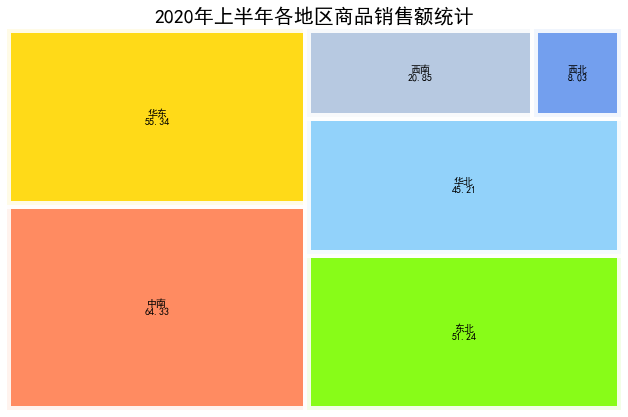

In [1]:
#树状图
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.sans-serif']=['SimHei']     #显示中文
plt.rcParams['axes.unicode_minus']=False       #正常显示负号
import squarify
import pymysql

#连接MySQL数据库
conn = pymysql.connect(host='127.0.0.1',port=3306,user='root',password='root',db='sales',charset='utf8')
#读取订单表数据
sql = "SELECT region,ROUND(SUM(sales)/10000,2) as sales FROM orders where dt=2020 GROUP BY region order by sales desc"
df = pd.read_sql(sql,conn)

plt.figure(figsize=(11,7))   #设置图形大小
colors = ['Coral','Gold','LawnGreen','LightSkyBlue','LightSteelBlue','CornflowerBlue']   #设置颜色数据
plot=squarify.plot(
    sizes=df['sales'],       #指定绘图数据
    label=df['region'],      #标签
    color=colors,            #指定自定义颜色
    alpha=0.9,               #指定透明度
    value=df['sales'],       #添加数值标签
    edgecolor='white',       #设置边界框白色
    linewidth=8              #设置边框宽度为3  
)

plt.rc('font',size=16)      #设置标签大小
plot.set_title('2020年上半年各地区商品销售额统计',fontdict={'fontsize':20})    #设置标题及大小
plt.axis('off')    #去除坐标轴
plt.tick_params(top='off',right='off')    #去除上边框和右边框刻度
plt.show()

In [2]:
#旭日图
#声明Notebook类型，必须在引入pyecharts.charts等模块前声明
from pyecharts.globals import CurrentConfig, NotebookType
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_LAB

from pyecharts import options as opts
from pyecharts.charts import Sunburst

def sunburst() -> Sunburst:
    data = [
        opts.SunburstItem(
            name="爷爷奶奶",
            children=[
                opts.SunburstItem(
                    name="张叔叔李阿姨",
                    value=15,
                    children=[
                        opts.SunburstItem(name="表妹张诗诗", value=2),
                        opts.SunburstItem(
                            name="表哥张政",
                            value=5,
                            children=[opts.SunburstItem(name="表侄张佳", value=2)],
                        ),
                        opts.SunburstItem(name="表姐张意涵", value=4,
                             children=[opts.SunburstItem(name="表侄张文海", value=2)],
                        ),
                    ],
                ),
                opts.SunburstItem(
                    name="爸爸妈妈",
                    value=10,
                    children=[
                        opts.SunburstItem(name="我", value=5),
                        opts.SunburstItem(name="哥哥张伟", value=3),
                    ],
                ),
            ],
        ),
    ]

    c = (
        Sunburst()
        .add(series_name="我的家庭成员旭日图", data_pair=data, radius=[0, "85%"])
        .set_global_opts(title_opts=opts.TitleOpts(title="我的家庭成员旭日图"),
                         toolbox_opts=opts.ToolboxOpts())
        .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}"))
    )
    return c

#第一次渲染时候调用load_javascript文件
sunburst().load_javascript()
#展示数据可视化图表
sunburst().render_notebook()

In [3]:
#和弦图
#导入相关库
import json
from pyecharts import options as opts
from pyecharts.charts import Graph

with open("D:/Python数据可视化分析与案例实战/ch07/miserables.json", "r", encoding="utf-8") as f:
    j = json.load(f)
    nodes = j["nodes"]
    links = j["links"]

c = (
    Graph(init_opts=opts.InitOpts(width="550px", height="550px"))
    .add(
        "",
        nodes=nodes,
        links=links,
        layout="circular",
        is_rotate_label=True,
        linestyle_opts=opts.LineStyleOpts(color="source", curve=0.4),
        label_opts=opts.LabelOpts(position="right"),
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="2020年9月客户分享和弦图",title_textstyle_opts=opts.TextStyleOpts(font_size=20)),
        legend_opts=opts.LegendOpts(orient="vertical", pos_left="20%", pos_top="20%"),
    )
    .render("和弦图.html")
)